In [12]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, MaxPool2D

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model



In [ ]:
# Print the model summary



***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [4]:
# Build the Sequential convolutional neural network model
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [5]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [6]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mae'])

In [7]:
# Print the resulting model attributes


***
<a id="coding_tutorial_4"></a>
## The fit method

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [18]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [19]:
# Print the shape of the training data
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [15]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

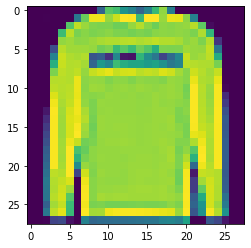

label: Pullover


In [20]:
# Display one of the images
i=566
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [21]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255
test_images = test_images / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Fit the model

In [22]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 14s 56ms/step - loss: 1.3125 - accuracy: 0.6037 - mae: 0.1254
Epoch 2/10
235/235 [==============================] - 13s 56ms/step - loss: 0.4971 - accuracy: 0.8224 - mae: 0.0559
Epoch 3/10
235/235 [==============================] - 13s 56ms/step - loss: 0.4288 - accuracy: 0.8491 - mae: 0.0478
Epoch 4/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3935 - accuracy: 0.8604 - mae: 0.0437
Epoch 5/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3781 - accuracy: 0.8665 - mae: 0.0414
Epoch 6/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3562 - accuracy: 0.8736 - mae: 0.0393
Epoch 7/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3506 - accuracy: 0.8764 - mae: 0.0382
Epoch 8/10
235/235 [==============================] - 13s 56ms/step - loss: 0.3363 - accuracy: 0.8811 - mae: 0.0365
Epoch 9/10
235/235 [==============================] - 13s 56ms/step - lo

#### Plot training history

In [23]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df

,loss,accuracy,mae
0,0.871528,0.725200,0.091024
1,0.476738,0.831033,0.053361
2,0.418285,0.853533,0.046517
3,0.388784,0.863267,0.042841
4,0.370306,0.868967,0.040670
5,0.355794,0.874433,0.038912
6,0.345647,0.877483,0.037708
7,0.335897,0.880833,0.036604
8,0.328339,0.883533,0.035703
9,0.322046,0.886883,0.035002


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

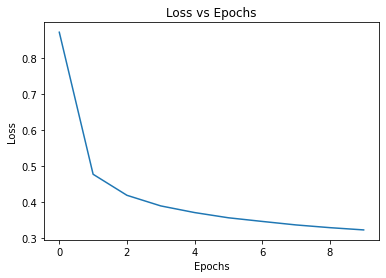

In [24]:
# Make a plot for the loss
loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

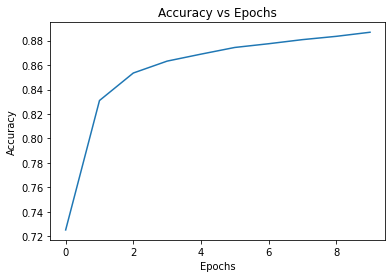

In [25]:
# Make a plot for the accuracy
loss_plot = df.plot(y='accuracy', title='Accuracy vs Epochs', legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Mean squared error'), Text(0.5, 0, 'Epochs')]

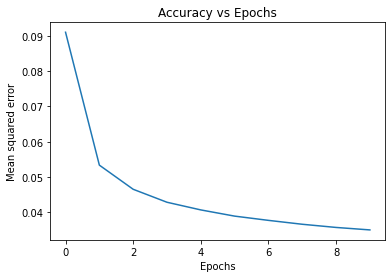

In [26]:
# Make a plot for the additional metric
loss_plot = df.plot(y='mae', title='Accuracy vs Epochs', legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Mean squared error")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [28]:
# Evaluate the model
test_loss, test_acc, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3475 - accuracy: 0.8764 - mae: 0.0366


#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

